# Uncertainty quantification and active learning

_by S Luukkonen_

In this practical, we will look at two emerging concepts in machine learning: [uncertainty quantification](https://en.wikipedia.org/wiki/Uncertainty_quantification) and [active learning](https://en.wikipedia.org/wiki/Active_learning_(machine_learning)). 

# Theory

## Uncertainty quantification in regression

Most ML-based QSAR prediction models are “black boxes” giving single y-predictions (regression) or
y-classes (classification) without any indication of the quality of a single prediction. They are difficult to
interpret, are susceptible to pathological failures in out-of-domain regimes and lack guarantees of their
robustness. The importance of uncertainty estimation when models are used for decision making, has been noted in the _computationally aided drug discovery_ community, but its systematic use is lacking [[Begoli, 2019](https://doi.org/10.1038/s42256-018-0004-1), [Mervin, 2021](https://10.1016/j.drudis.2020.11.027)].

In this pratical we will concentrate on uncertainty quantification in regression models, but there is a short theory [section](#uncertainty-quantification-in-classification-models) on uncertainty calibration of classiers.

### Aletoric and epistemic uncertainty

The uncertainty in a ML model prediction comes from two source:
- Aleatoric (also know as stochastic uncertainty) that comes from the noise in the data (_i.e._ the experimental error of bioactivity measures in this cases)
- Epistemic (also know as systematic uncertainty) which is the uncertainty of the model often due to lack of training data (you might be trying to use a model out of its domain of applicability) but is also affected by the suitability of model architecture (a too simple or complex model can lead to large uncertainty).

![image](images/aletoric_epistemic_uncertainty.PNG)

_From [Amini et al., 2019](https://proceedings.neurips.cc/paper/2020/hash/aab085461de182608ee9f607f3f7d18f-Abstract.html)_

In a regression deep learning model, the aleatoric uncertainty is easily optained by [_mean-variance estimation_](https://ieeexplore.ieee.org/document/374138) which consists of adding a second output to estimate the aleotoric variance and using an adapted loss function that depends both on the error of the mean prediction and the estimated uncertainty (see figure in [practical](#uncertainty-quantification) section).

### (Approximated) Bayesian neural networks

The epistemic uncertainty, _i.e._ the uncertainty of model parameters, can be obtained with Bayesien neural networks (BNNs), where each parameter is a probability distribution to be optimized instead of an single value to be optimized. Training these probablistic networks is very expensive and thus their use is only limited to small systems with limited datasets.

<!-- ![image](images/SNNvsBNN.png) -->
<img src="images/SNNvsBNN.png" alt=" " width="500"> 

_From [The Very Basics of Bayesian Neural Networks](https://sanjaykthakur.com/2018/12/05/the-very-basics-of-bayesian-neural-networks/)_

However, a Bayesian neural network can be approximated by variational inference where the BNN is approximated with an [ensemble](https://en.wikipedia.org/wiki/Ensemble_learning) of non-Bayesien neural networks. Variations of variational inference include
- classic **ensemble** modelling where multiple models are trained using either multiple different architectures and/or different initial parameters (quite expensive as multiple models need to be trained)
- **bagging/boostrapping** where multiple models are trained on different subsets of the training data (quite expensive as multiple models need to be trained)
- **Monte Carlo dropout** where a single network is trained but a virtual ensemble of models is created during prediction by muting a random set of nodes (quite fast as only one model is trained, see figure in [practical](#uncertainty-quantification) section)


Note that, in here we concentrate on uncertainty quantification in deep learning models, but any ensemble model (such as Random Forrest) is able to estimate epistemic uncertainty.  

### Total uncertainty in regression models

In this practical, we used methods that could either quantify the aletoric or epistemic uncertainty. However, there are approaches that can model both uncertainties simultaneously such as [Gaussian process regression](https://en.wikipedia.org/wiki/Kriging) and [evidential learning](https://proceedings.neurips.cc/paper/2020/hash/aab085461de182608ee9f607f3f7d18f-Abstract.html), or we can approximate the predictive variance as a combination of aletoric and epistemic uncertainties from the MVE and Baysien neural network (approximated here with the MC dropout).

### Evaluation of the uncertainty estimations



Note that all the methods discussed above are approximate estimates of the uncertainty, and therefore, they are not perfect and their quality should be evaluated.

We can visually evalute the quality by
- a _**calibration curve**_ which plots the fraction of correctly observed output labels as a function of the expected fraction correctly. _Eg._ we expect 68% of the predictions to be within one standard deviation away (derived from their predicted variance) of their mean prediction. If the true fraction is higher the model is under-confident (_i.e_ predicting too large error bars), and if its below the model is over-confident (_i.e_ predicting too small error bars). Overall, the closer the curve is to the identity line, the better the calibration is.
- a _**RMSE-drop curve**_ which plots the cumulative root-mean-squared error as the function the ofconfidence (molecules ranked based on the uncertainty estimation). The larger the drop in the curve at higher confidence, the better the calibration.

**TO DO add figure of calibration curve and RMSE drop**

There are also metrics to evaluate the quality
- _**miscalibration area (MCA)**_ - the area between the calibration curve and the identity line. The lower, the better.
- _**Spearman's rank correlation coefficient (rho)**_ between the estimated uncertainty and the absolute error. The higher, the better.
- _**expected normalized calibration error (ENCE)**_ averages the calibration error for binned predictions (based on predicted variance), normalized by the bin’s mean predicted variance, since for a larger variance, we expect naturally larger errors. The lower, the better.

## Uncertainty quantification in classification models

_As additional information, not part of the practical (can be skipped)_

The raw output of classifier is probabalistic and thus inherently includes an estimation of uncertainty. For binary classifiers, the probabilistic output is a continuous value between 0 and 1. The closer the value is to 0 or 1, the more confident the model is in its predictions to belong to the negative or postive class, respectively. Whereas closer the value is to 0.5, the less confident the model is in its prediction.

However, usually, the probabilistic outputs are rounded to binary values, losing all information of uncertainty. Moreover, using the probabilistic output is not necessarily a well-calibrated probability that can be used as a good estimation of the uncertainty. Thus, the model calibration should be evaluated (and potentially corrected). 

### Accuracy, discrimination and calibration

- [Accuracy](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) measures the ratio of correctly predicted binary predictions 
- [Discrimination](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) measures the the model's ability to differentiate between postive classes from negative ones
- [Calibration](https://scikit-learn.org/stable/modules/calibration.html) measures the agreement between the frequency of observed events with the predicted probabilities

Usually, the performance of a binary classifier is measured by its accuracy (overall accuracy, specificity, sensitivity, Matthew’s correlation coefficient, ect.) or its capacity to discriminate (ROC, AUC), but verifying the calibration of the model is often omitted.

### Evaluation of calibration

The quality of calibration can be visually checked with a calibration curves (also known as reliability diagrams) which plots the true frequency of the positive label (_i.e._ fraction of positives) against its predicted probability, for binned predictions (_i.e._ mean predicted probability in each bin). Closer the the curve is to the identity line, the better calibrated the model is.

The quality of the calibration can also be quantified with calibration error (also called [Brier score](https://en.wikipedia.org/wiki/Brier_score)) which measure the accuracy of prediction against its predicted probability, for binned predictions. 


### Prediction calibration
There are several techniques to calibrate prediction by using a validation set to learn a transformation of
their output score, _eg._ [Platt scaling](https://home.cs.colorado.edu/~mozer/Teaching/syllabi/6622/papers/Platt1999.pdf) or [isotonic regression](https://dl.acm.org/doi/10.1145/775047.775151).



## Active learning

Active learning is a technique in machine learning that selects the most informative samples for annotation to optimize the learning process. Traditional machine learning algorithms require a large amount of labeled data to achieve high accuracy. However, in many real-world scenarios, obtaining labeled data can be expensive, time-consuming, or simply impossible. By iteratively selecting subsets of unlabeled data and requesting annotations (_eg._ experimental measure of bioactivity), the algorithm can update its model and improve accuracy while minimizing the need for experiments. Active learning has been successfully applied in various domains, reducing annotation cost significantly while improving accuracy.

<img src="images/active_learning.PNG" alt=" " width="1000"> 

# Practical

In [1]:
!bash ./init.sh 

In [2]:
# Import libraries needed in the lab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from utils import seed_everything
seed = 42 # set a random seed for random operatioons to make results reproducible
seed_everything(seed)

import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 2

## Data pre-processing and visualization

As data, we will use molecules from a small dataset of adenosine a2a receptor (AA2AR,  [P29274](https://www.uniprot.org/uniprotkb/P29274/entry)) bioactivity measures `AA2AR.csv`. This data was retrieved from [Papyrus](https://doi.org/10.1186/s13321-022-00672-x) and the `pChEMBL_values_Mean` values correspond to experimental activity measures coming from a variety of assays run in different laboratories under different assay conditions or even by different methods. This makes the data quite noisy as the standard experimental uncertainty is estimated to be around 0.5 pChEMBL units [[Kramer, 2012](https://doi.org/10.1021/jm300131x)].

Thus to make it easier, in this practical, we will create predicition task without noise (i.e. no experimental/aletoric uncertainty) for these molecules. We can use for example the calculate partition coefficient (clogP). It is a simulated logP prediction calculated with an exact formula depending only the chemical composition of the compound and thus is noiseless. Here we calculate the clogP with `rdkit`.

_Remark: the bioactivity data with the experimental noise will be used in the assignement_

### Output lables

Lets load the molecules from the AA2AR dataset,

<AxesSubplot: ylabel='Frequency'>

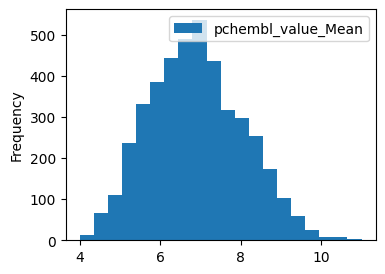

In [3]:
# Load the data
data = pd.read_csv('AA2AR.csv')

# Plot histogram of the pchembl values
data.plot.hist(y='pchembl_value_Mean', bins=20, figsize=(4, 3))

and create output labels by calculating the clogP values for the molecules,

<AxesSubplot: ylabel='Frequency'>

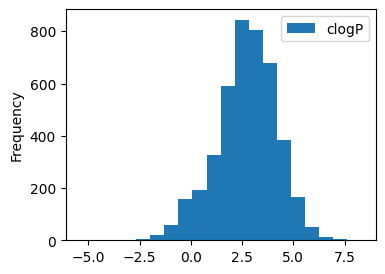

In [4]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# New column with the clogP value
# Each SMILES string is converted to a rdkit molecule object and the clogP value is calculated 
# using the MolLogP function from the rdkit.Chem.Descriptors module
data['clogP'] = data['SMILES'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))

# Plot the histogram of the clogP values with pandas plot function
data.plot.hist(y='clogP', bins=20, figsize=(4, 3))

In [5]:
# Standardize scale of the clogP values
data['clogP'] = (data['clogP'] - data['clogP'].mean()) / data['clogP'].std()

# Standardize scale of the pchembl values
data['pchembl_value_Mean'] = (data['pchembl_value_Mean'] - data['pchembl_value_Mean'].mean()) / data['pchembl_value_Mean'].std()

### Input features

As you have learn by now, there are a variety of molecular descriptors that can be used to as input features of a QSPR model. In this practical we will use the [MACCS keys](https://doi.org/10.1021/ci010132r), a binary molecular fingerprint of 167 bits, calculated with `rdkit`.

In [6]:
from rdkit.Chem import MACCSkeys
from rdkit.Chem import AllChem

# New column with the MACCS keys
# Each SMILES string is converted to a rdkit molecule object and the MACCS keys are calculated
# using the GenMACCSKeys function from the rdkit.Chem.MACCSkeys module
data['MACCS'] = data['SMILES'].apply(lambda x: MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(x)))

# # New column with the Morgan fingerprints
# # Each SMILES string is converted to a rdkit molecule object and the Morgan fingerprints are calculated
# # using the GetMorganFingerprintAsBitVect function from the rdkit.Chem.AllChem module
# data['MACCS'] = data['SMILES'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), 2))

data.head()

,SMILES,pchembl_value_Mean,clogP,MACCS
0,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,1.544399,0.016526,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,-1.778232,0.817167,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,-1.063781,-0.022189,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,NC(=NC(=O)Cn1c(O)c2CCCCc2c1O)Nc1nc2c(cccc2)s1,-1.365056,-0.252535,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,-1.235507,-0.344606,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [7]:
# fps = np.array(data.MACCS.values.tolist())

# # Drop low variance features
# from sklearn.feature_selection import VarianceThreshold

# # Select features with a variance above 0.1
# sel = VarianceThreshold(threshold=(.05))
# sel.fit(fps)

# # Get the indices of the selected features
# idxs = sel.get_support(indices=True)

# # Select the features
# fps = fps[:, idxs]

# # Stakced bars of the number of 1s and 0s in the MACCS keys
# plt.figure(figsize=(10, 5))
# plt.bar(np.arange(0, len(idxs)), np.sum(fps, axis=0), label='1')
# # plt.bar(np.arange(0, 167), 1024 - np.sum(fps, axis=0), bottom=np.sum(fps, axis=0), label='0')

# data['MACCS'] = [list(x) for x in fps]

# data.head()

### Data splits

Next we split the data into three subsets:
- training set (70%) - the initial training set
- learning set (20%) -  a set from which the model can select new training data points during the active learning process
- test set (10%) - independent test set used to evaluate the model

In [53]:
from sklearn.model_selection import train_test_split

indices = np.arange(data.shape[0])

# Split the data into train and test sets
train_idx, test_idx = train_test_split(indices, test_size=1/10, random_state=seed)

# Split the train set into train and learn sets
train_idx, learn_idx = train_test_split(train_idx, test_size=2/9, random_state=seed)

# Create a new column with the subset name
data.loc[train_idx, 'Subset'] = 'Train'
data.loc[learn_idx, 'Subset'] = 'Learn'
data.loc[test_idx, 'Subset'] = 'Test'

## Uncertainty quantification

In this practical, we will use a neural network model with combined with two uncertainty quantification methods:
- [Mean-variance estimation](https://ieeexplore.ieee.org/document/374138) to estimate the aleatoric uncertainty. Instead of single output node the neural network has two output nodes.  One corresponding to the mean prediction and the other to estimated aleatoric uncertainty. 

- [Monte Carlo dropout](https://arxiv.org/abs/1506.02142) as an approximate a Bayesian network to measure the epistemic uncertainty of the model. During prediction multiple forward passes are done where at each pass a different subset of nodes are masked. Thus, we get a set of predictions for each molecules, from which we can estimate the mean and the epistemic uncertainty.

<img src="images/MVE_MCdropout.PNG" alt=" " width="1000"> 

### Common models hyperparameters

Lets define some common model hyperparameters for all models for consistency

In [54]:
BATCH_SIZE = 128
EPOCHS = 50
INPUT_SIZE =  len(data['MACCS'].iloc[0])
HIDDEN_SIZE = INPUT_SIZE * 2

print('Input size: ', INPUT_SIZE)
print('Hidden size: ', HIDDEN_SIZE)

Input size:  167
Hidden size:  334


### Dataloaders

For the section on the uncertainty quantification, we will only use the train and test subsets. Lets create `torch.Dataloader`s for both the bioactivity and logP predictions:

In [55]:
from utils import create_dataloader

train_loader = create_dataloader(data, 'Train', 'clogP', 'MACCS', batch_size=BATCH_SIZE)
test_loader = create_dataloader(data, 'Test', 'clogP', 'MACCS', batch_size=BATCH_SIZE)

### Training

Let's build a model class which can evaluate both the aleatoric and epistemic uncertainties:

In [56]:
class Network(nn.Module):

    def __init__(self, input_size, hidden_size, dropout=0.2):
        super(Network, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size), # 1st layer
            nn.ReLU(), # activation function
            nn.Dropout(p=dropout), # dropout layer
            nn.Linear(hidden_size, hidden_size), # 2nd layer
            nn.ReLU(), # activation function
            nn.Dropout(p=dropout), # dropout layer
            nn.Linear(hidden_size, 2), # output layer with two nodes (mean and variance)
        )

    def forward(self, x):
        preds = self.linear_relu_stack(x)
        mean = preds[:, 0]
        var = torch.abs(preds[:, 1]) # we use the absolute value of the variance to ensure it is positive
        return mean, var

Let's also create `train` helper function to fit the model.

In [57]:
# As originally MC dropout was developped for model regularization during training (to avoid overfitting), 
# and here we want to use it for multiple predictions, we need to create two helper functions to disable 
# dropout layers during training and enabling them during evaluation.
def disable_dropout(model):
    """ Function to disable the dropout layers during training """
    for m in model.modules():
        if m.__class__.__name__.startswith('Dropout'):
            m.eval()

def enable_dropout(model):
    """ Function to enable the dropout layers during evaluation """
    for m in model.modules():
        if m.__class__.__name__.startswith('Dropout'):
            m.train()

def train(dataloader, model, epochs):

    """ 
    Trains a neural MVE network model with Gaussian NLL loss function for a given number of epochs.

    Parameters
    ----------
    dataloader : torch.utils.data.DataLoader
        Dataloader object containing the training data.
    model : NeuralNetworkMVE
        Neural network model.
    epochs : int
        Number of epochs to train the model.
    """

    for epoch in range(epochs):
        device = torch.device("cpu")
        loss_fn = nn.GaussianNLLLoss() # Loss function that depends both a mean predicition and the aleatoric variance
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
        model.train()
        disable_dropout(model)

        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            # Make predictions
            mean, var = model(X)

            # Compute loss
            loss = loss_fn(y, mean, var)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch} - loss: {loss.item():>7f}")

Now can train the model:

In [58]:
seed_everything(seed) #ensure reproducibility of results across runs
model = Network(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE)
train(train_loader, model, epochs=EPOCHS)

Epoch 0 - loss: 0.458681
Epoch 10 - loss: 0.174742
Epoch 20 - loss: 0.074435
Epoch 30 - loss: 0.596222
Epoch 40 - loss: -0.285250
Epoch 49 - loss: 0.795936


Now that we have the trained model, let's first evaluate the aleatoric uncertainty, then the epistemic one and finally take a look at the total uncertainty of the model for the clogP predicitions.

### Helper function to evaluate the uncertainty quantification

First, let's create some helper function to visualize and quantify the quality of the uncertainty estimations.

In [59]:
def plot_variance_distribution(variance, title):

    """
    Plot the distribution of the variance of the predictions of a model.

    Parameters
    ----------
    variance : numpy.ndarray
        Array with the variance of the predictions of a model.
    title : str
        Title of the plot.
    """
    
    fig, ax = plt.subplots(figsize=(4, 4))

    ax.hist(variance, bins=50, density=True, ec='k', histtype='stepfilled'  )
    ax.axvline(variance.mean(), color='k', linestyle='--', linewidth=2, label=f'Mean: {variance.mean():.2f}')
    ax.axvline(variance.median(), color='k', linestyle='-', linewidth=2, label=f'Median: {variance.median():.2f}')
    ax.set_xlabel('Variance')
    ax.set_ylabel('Density')
    ax.set_title(title)
    ax.grid(linestyle='--', alpha=0.5)
    ax.legend()

In [60]:
from scipy.stats import norm, spearmanr
from scipy.integrate import simps

def compute_calibration_curve(y_true, y_mean, y_var, step=0.01):

    """
    Computes the calibration curve and the miscalibration area (MCA) for a given set of predictions.

    Parameters
    ----------
    y_true : numpy array
        True values of the target variable.
    y_mean : numpy array
        Mean of the predicted values of the target variable.
    y_var : numpy array
        Variance of the predicted values of the target variable.

    Returns
    -------
    expected_frac : numpy array
        Expected fraction of samples in each bin.
    real_frac : numpy array
        Real fraction of samples in each bin.
    mca : float
        Miscalibration area.
    """

    expected_frac = np.array( [ 2*i for i in np.arange(0,0.5+step,step) ] )  
    nmols = len(y_true)
    real_frac = []
    for j in range(len(expected_frac)):
        plow = 0.5 - expected_frac[j] / 2
        pup = 0.5 + expected_frac[j] / 2
        cum = 0
        for k in range(nmols):
            if norm.ppf(plow, loc=y_mean[k], scale=y_var[k]) <= y_true[k] <= norm.ppf(pup, loc=y_mean[k], scale=y_var[k]): cum += 1            
        real_frac.append(cum/nmols)

    c_norm = simps(np.array(expected_frac))
    cal_diff = np.abs(real_frac-expected_frac)
    mca = simps(cal_diff/c_norm)
    
    return expected_frac, real_frac, mca

def plot_calibration_curve(y_true, y_mean, y_var):

    """
    Plots the calibration curve and the miscalibration area (MCA) for a given set of predictions.

    Parameters
    ----------
    y_true : numpy array
        True values of the target variable.
    y_mean : numpy array
        Mean of the predicted values of the target variable.
    y_var : numpy array
        Variance of the predicted values of the target variable.
    """

    expected_frac, real_frac, mca = compute_calibration_curve(y_true, y_mean, y_var)
    
    fig, ax = plt.subplots(figsize=(4, 4))

    ax.plot(expected_frac, real_frac, '-', label='MCA = {:.2f}'.format(mca))
    ax.plot([0, 1], [0, 1], 'k--', label='Perfect calibration')
    ax.set_xlabel('Expected fraction')
    ax.set_ylabel('Observed fraction')

    ax.legend(loc='lower right')
    ax.grid(linestyle='--', alpha=0.5)


In [61]:
from sklearn.metrics import mean_squared_error

def compute_ence(y_true, y_mean, y_var, bins=10):

    """
    Computes the expected normalized calibration error (ENCE) for a given set of predictions.

    Parameters
    ----------
    y_true : numpy array
        True values of the target variable.
    y_mean : numpy array
        Mean of the predicted values of the target variable.
    y_var : numpy array
        Variance of the predicted values of the target variable.
    bins : int, optional
        Number of bins to use for the ENCE calculation.

    Returns
    -------
    ence : float
        Expected normalized calibration error.
    """

    ranked_confidence_list = np.argsort(y_var, axis=0).flatten()

    # Split the data into bins
    bin_size = int(len(ranked_confidence_list) / bins)
    bin_list = [ranked_confidence_list[i:i+bin_size] for i in range(0, len(ranked_confidence_list), bin_size)]

    # Compute mean variance and RMSE for each bin
    ence = 0
    for bin in bin_list:
        rmv = np.sqrt(np.mean(y_var[bin]))
        rmse = np.sqrt(mean_squared_error(y_true[bin], y_mean[bin]))
        ence += np.sqrt(mean_squared_error(y_true[bin], y_mean[bin])) / np.mean(y_var[bin])
    ence /= bins

    return ence

def plot_rmsedrop(y_true, y_mean, y_var):

    """
    Plots the RMSE drop for a given set of predictions.

    Parameters
    ----------
    y_true : numpy array
        True values of the target variable.
    y_mean : numpy array
        Mean of the predicted values of the target variable.
    y_var : numpy array
        Variance of the predicted values of the target variable.
    """

    ence = compute_ence(y_true, y_mean, y_var)
    
    nmols = len(y_true)
    rmse_drop = []
    ranked_confidence_list = np.argsort(y_var, axis=0).flatten()
    for k in range(nmols):
        conf = ranked_confidence_list[0:k+1]
        conf_rmse = np.sqrt(mean_squared_error(y_true[conf], y_mean[conf]))
        rmse_drop.append(conf_rmse) 

    rmse_drop = np.flip(rmse_drop)
    confidence = np.linspace(0, 1, nmols)

    fig, ax = plt.subplots(figsize=(4, 4))

    ax.plot(confidence, rmse_drop, '-', label='ENCE = {:.2f}'.format(ence))
    ax.set_xlabel('Confidence')
    ax.set_ylabel('RMSE drop')
    ax.legend(loc='lower right')
    ax.grid(linestyle='--', alpha=0.5)
    ax.set_xlim(0.01, 0.99)


### Aleatoric uncertainty

Lets start with the MVE and make a single forward pass (without MC dropout) to predict the clogP values and the associated aleatoric uncertainty.

In [62]:
def predict_aleatoric(dataloader, model):

    """
    Predicts the mean and the aleatoric variance of the target variable for a given set of data.

    Parameters
    ----------
    dataloader : torch.utils.data.DataLoader
        Dataloader object containing the test data.
    model : NeuralNetworkMVE
        Neural network model.
    
    Returns
    -------
    means : torch.Tensor
        Mean of the predicted values of the target variable.
    vars : torch.Tensor
        Variance of the predicted values of the target variable.
    """


    device = torch.device("cpu")
    model.eval()
    means, vars = [], []
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        with torch.no_grad():
            mean, var = model(X)
        means.append(mean)
        vars.append(var)

    means = torch.cat(means)
    vars = torch.cat(vars)
    return means, vars

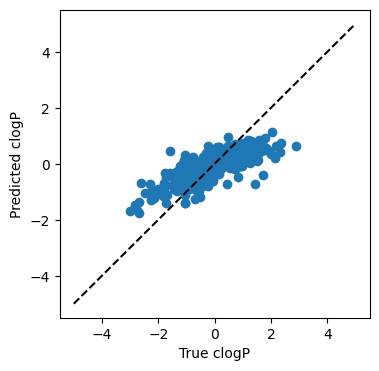

In [63]:
y_test_mean, y_test_alea_var = predict_aleatoric(test_loader, model)

# Plot correlation between predicted and true values
y_true = data[data.Subset == 'Test']['clogP'].values
y_mean = y_test_mean.detach().numpy()

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(y_true, y_mean, 'o')
ax.set_xlabel('True clogP')
ax.set_ylabel('Predicted clogP')
ax.plot([-5, 5], [-5, 5], 'k--')

We can take a look at the distribution of the variance:

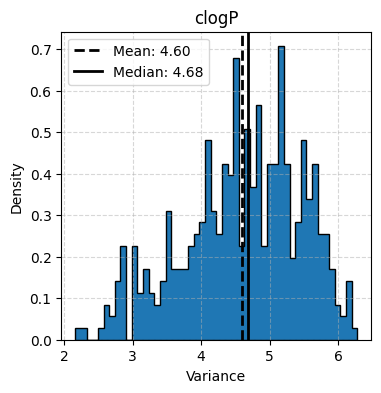

In [64]:
plot_variance_distribution(y_test_alea_var, 'clogP')

and we observe that the mean and median estimated aleatoric uncertainty are not zero, as maybe we could have expected as the data should not have any noise. This illustrates that the methods is approximate, but nonetheless the uncertainty values are low as they should be for noiseless data.


Now lets see if the uncertainty quantification are well-calibrated:

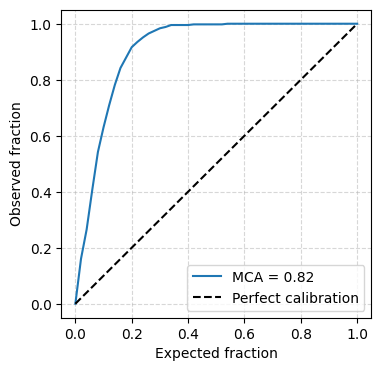

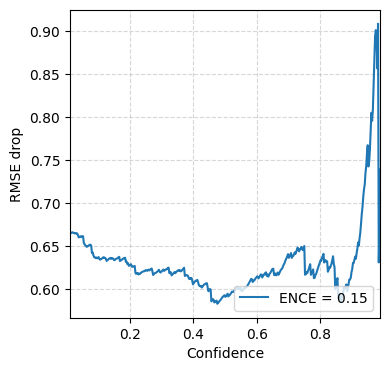

In [65]:
y_true = data[data.Subset == 'Test']['clogP'].values
y_mean = y_test_mean.detach().numpy()
y_var = y_test_alea_var.detach().numpy()

plot_calibration_curve(y_true, y_mean, y_var)
plot_rmsedrop(y_true, y_mean, y_var)

The calibration is not great: there is no systematic RMSE-drop and the model is clearly overconfident. This is not suprising as the aleatoric uncertainty is only a part of the total predictive uncertainty.

### Epistemic uncertainty

Now lets try to estimate the epistemic uncertainty of our models with Monte Carlo dropout. During prediction making, we create a virtual ensemble model, to get the mean prediction and the epistemic uncertainty, by making predictions with 20 versions of the models where 20% of the nodes are silenced (selected at random). 

In [66]:
def predict_epistemic(dataloader, model, n_samples=10):

    """
    Predicts the mean and variance of the target variable with Monte Carlo droupout for a given set of inputs.
    Enables dropout layers during evaluation.

    Parameters
    ----------
    dataloader : torch.utils.data.DataLoader
        Dataloader object containing the test data.
    model : NeuralNetwork
        Neural network model.
    n_samples : int
        Number of samples to average over.

    Returns
    -------
    mean : torch.Tensor
        Mean of the predicted values of the target variable.
    var : torch.Tensor
        Variance of the predicted values of the target variable.
    """

    device = torch.device("cpu")
    model.eval()
    enable_dropout(model)
    
    preds = np.empty((len(dataloader.dataset), n_samples))
    
    for sample in range(n_samples):
        preds_sample = []
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            with torch.no_grad():
                pred, _ = model(X)
            preds_sample.append(pred)
        preds_sample = torch.cat(preds_sample)
        preds[:, sample] = preds_sample.detach().numpy().squeeze()

    mean = torch.Tensor(preds.mean(axis=1))
    var = torch.Tensor(preds.var(axis=1))    

    return mean, var

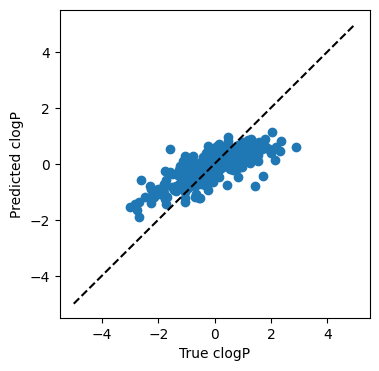

In [67]:
y_test_mean, y_test_epi_var = predict_epistemic(test_loader, model, n_samples=20)

# Plot correlation between predicted and true values
y_true = data[data.Subset == 'Test']['clogP'].values
y_mean = y_test_mean.detach().numpy()

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(y_true, y_mean, 'o')
ax.set_xlabel('True clogP')
ax.set_ylabel('Predicted clogP')
ax.plot([-5, 5], [-5, 5], 'k--')

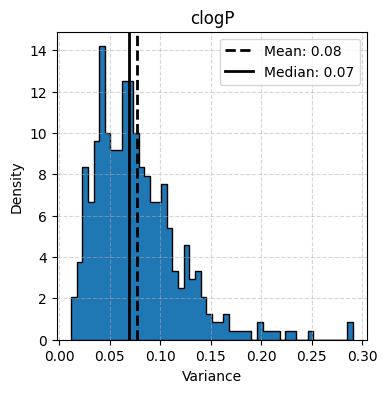

In [68]:
plot_variance_distribution(y_test_epi_var, 'clogP')

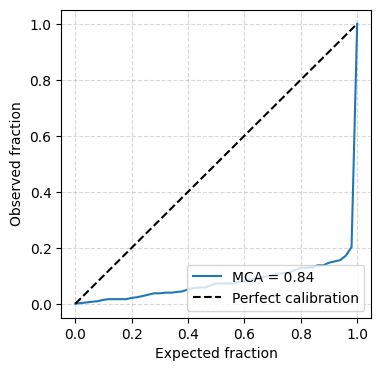

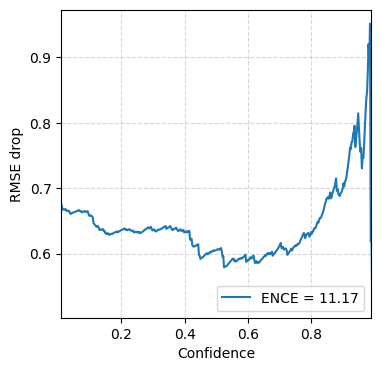

In [69]:
y_true = data[data.Subset == 'Test']['clogP'].values
y_mean = y_test_mean.detach().numpy()
y_var = y_test_epi_var.detach().numpy()

plot_calibration_curve(y_true, y_mean, y_var)
plot_rmsedrop(y_true, y_mean, y_var)

### Total uncertainty in regression models

We can approximate the predictive variance as a combination of aletoric and epistemic uncertanties from the MVE and MC dropout:

In [70]:
def predict_total(dataloader, model, n_samples=100):

    """
    Make predictions with total uncertainty estimated by combining aleatoric uncertainty (from MVE) 
    and epistemic uncertainty (from dropout).
    """

    device = torch.device("cpu")
    model.eval()
    enable_dropout(model)
    
    preds = np.empty((len(dataloader.dataset), n_samples))
    varsA = np.empty((len(dataloader.dataset), n_samples))
    
    for sample in range(n_samples):
        preds_sample, varsA_sample = [], []
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            with torch.no_grad():
                pred, varA = model(X)
            preds_sample.append(pred)
            varsA_sample.append(varA)


        preds_sample = torch.cat(preds_sample)
        varsA_sample = torch.cat(varsA_sample)

        preds[:, sample] = preds_sample.detach().numpy().squeeze()
        varsA[:, sample] = varsA_sample.detach().numpy().squeeze()

    means = torch.Tensor(preds.mean(axis=1))
    varsE = torch.Tensor(preds.var(axis=1))    
    vars = varsE + torch.Tensor(varsA.mean(axis=1))

    return means, vars

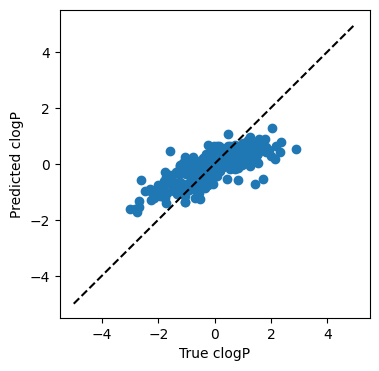

In [71]:
y_test_mean, y_test_tot_var = predict_total(test_loader, model, n_samples=20)

# Plot correlation between predicted and true values
y_true = data[data.Subset == 'Test']['clogP'].values
y_mean = y_test_mean.detach().numpy()

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(y_true, y_mean, 'o')
ax.set_xlabel('True clogP')
ax.set_ylabel('Predicted clogP')
ax.plot([-5, 5], [-5, 5], 'k--')

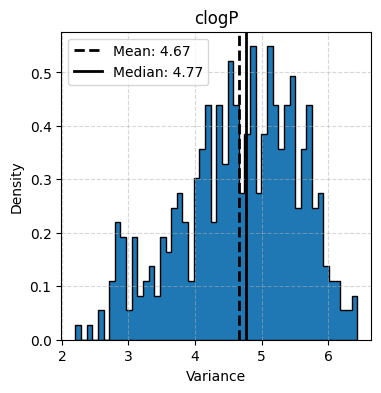

In [72]:
plot_variance_distribution(y_test_tot_var, 'clogP')

As we could have expected the total uncertainty is larger than the aleatoric and epistemic uncertainty. 
This is because the aleatoric uncertainty is the variance of the noise in the data and the epistemic uncertainty is the variance of the model parameters. 
The total uncertainty is the sum of these two uncertainties.

Also below, we see that now we have a well-calibrated model!

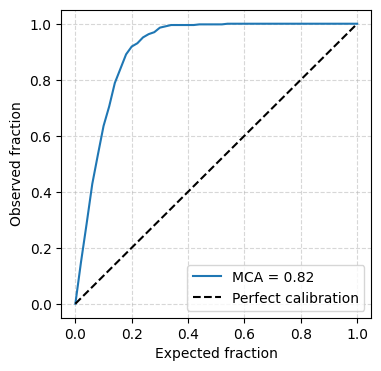

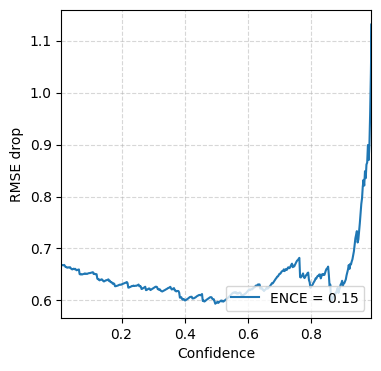

In [73]:
y_true = data[data.Subset == 'Test']['clogP'].values
y_mean = y_test_mean.detach().numpy()
y_var = y_test_tot_var.detach().numpy()

plot_calibration_curve(y_true, y_mean, y_var)
plot_rmsedrop(y_true, y_mean, y_var)

## Active learning

Now, lets build active learning scheme for the prediction of AA2AR activity. 
The most important choice in a active learning strategy is the selection criteria. 
If uncertainty estimations are available they are a sensible choice for the selection criteria, 
but active learning strategies can also be applied without uncertainty estimates.

In the assigment, you will use the mean prediction and the uncertainty estimates as selection criteria. 
Therefore, in this tutorial, we will use a baseline method of random selection. We can use the `train` and `predict_total` helper functions from before.

We also create an `evaluate` function to calculate the RMSE and R2 scores from the predictions to evaluate the performance of the model.

In [74]:
from sklearn.metrics import r2_score, mean_squared_error

def evaluate(y_true, y_pred):

    """
    Compute the root mean squared error, and R2 score
    
    Parameters
    ----------
    y_true : numpy array
        True values
    y_pred : numpy array
        Predicted values
        
    Returns
    -------
    rmse : float
        Root mean squared error
    r2 : float
        R2 score
    """
    
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    return rmse, r2

And most importantly, lets create a function to select molecules for the new training set:

In [30]:
def random_selection(data, nmolecules = 20):
    
        """
        Function to select molecules randomly from the dataset.
    
        Parameters
        ----------
        data : pandas DataFrame
            DataFrame containing the molecules
        nmolecules : int
            Number of molecules to select
    
        Returns
        -------
        data : pandas DataFrame
            Updated DataFrame containing the molecules
        """

        data_learn = data[data.Subset == 'Learn']
    
        # Select molecules randomly
        if nmolecules < len(data_learn):
            idx = np.random.choice(len(data_learn), nmolecules, replace=False)
            selected_smiles_list = data_learn.iloc[idx]['SMILES'].values
        else:
            selected_smiles_list = data_learn['SMILES'].values
    
        # Update training set
        data.loc[data.SMILES.isin(selected_smiles_list), 'Subset'] = 'Train'
    
        return data

Now we can create our active learning loop. We start by training the model on the initial training set, and then we update the training set by selecting the molecules with the highest minimum interset Tanimoto distance. We then train the model on the updated training set, and repeat this process until we have selected all the molecules.

Epoch 0 - loss: 1.141815
Epoch 10 - loss: 0.953680
Epoch 20 - loss: 1.770776
Epoch 30 - loss: 0.653231
Epoch 40 - loss: -0.456796
Epoch 49 - loss: 0.099478
Iteration: 0, RMSE: 0.686, R2: 0.521
Epoch 0 - loss: 0.511033
Epoch 10 - loss: 0.486429
Epoch 20 - loss: 0.287350
Epoch 30 - loss: 0.142523
Epoch 40 - loss: 0.210474
Epoch 49 - loss: 0.150041
Iteration: 1, RMSE: 0.750, R2: 0.429
Epoch 0 - loss: 0.428849
Epoch 10 - loss: 0.221790
Epoch 20 - loss: 0.155847
Epoch 30 - loss: 1.509457
Epoch 40 - loss: -0.001229
Epoch 49 - loss: -0.047357
Iteration: 2, RMSE: 0.725, R2: 0.466
Epoch 0 - loss: 0.496431
Epoch 10 - loss: 0.250635
Epoch 20 - loss: 0.096186
Epoch 30 - loss: 0.070675
Epoch 40 - loss: 0.459887
Epoch 49 - loss: 0.308766
Iteration: 3, RMSE: 0.766, R2: 0.403
Epoch 0 - loss: 0.541138
Epoch 10 - loss: 0.212730
Epoch 20 - loss: 0.325927
Epoch 30 - loss: 1.795959
Epoch 40 - loss: 0.154786
Epoch 49 - loss: 0.287098
Iteration: 4, RMSE: 0.818, R2: 0.320
Epoch 0 - loss: 0.581468
Epoch 10 - l

Text(0, 0.5, 'R2')

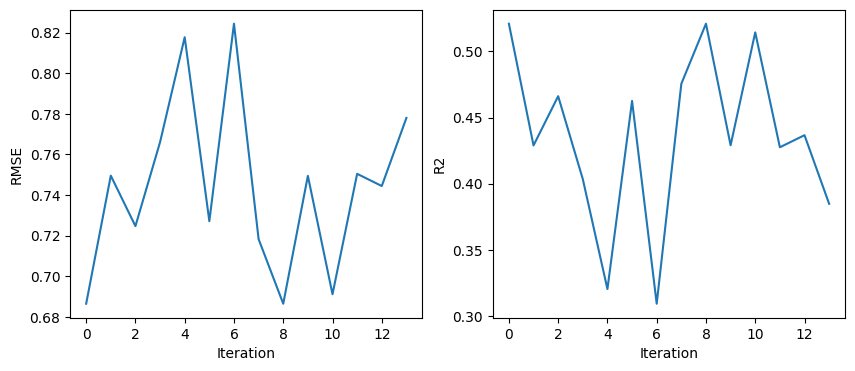

In [32]:
rmse_list, r2_list = [], [] #store results per iteration

df = data.copy()

for i in range(100):

    if i > 0:
        # Update training set
        df = random_selection(df, nmolecules=100)
        train_loader = create_dataloader(df, 'Train', 'pchembl_value_Mean', 'MACCS', batch_size=BATCH_SIZE)
    
    # Train model
    seed_everything(seed) #ensure reproducibility of results across runs
    del model
    model = Network(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE) 
    train(train_loader, model, epochs=EPOCHS)

    # Predict
    y_true = df[df.Subset == 'Test']['pchembl_value_Mean'].values
    y_pred, _ = predict_total(test_loader, model, n_samples=10)
    rmse, r2 = evaluate(y_true, y_pred)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print('Iteration: {:d}, RMSE: {:.3f}, R2: {:.3f}'.format(i, rmse, r2))

    if 'Learn' not in df.Subset.values:
        # The learning set has been exhausted
        print('The learning set has been exhausted')
        break

# Plot evolution of RMSE and R2 score
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(rmse_list)
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('RMSE')

ax[1].plot(r2_list)
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('R2')